In [1]:
import pandas as pd
import numpy as np
import os
import sys

In [2]:
import datetime

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from IPython.display import Image

Text(0.5, 1.0, 'Dataset Desctiption')

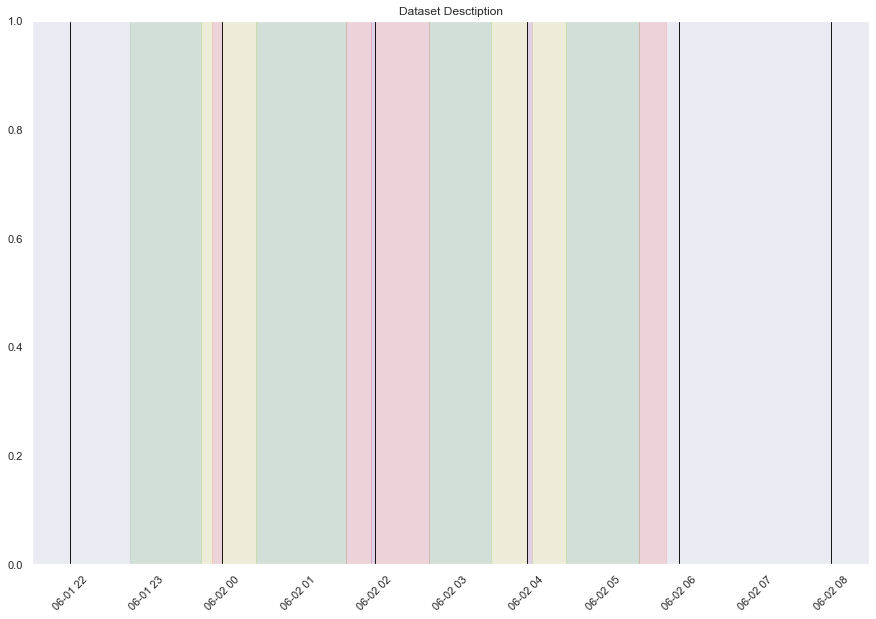

In [111]:
dataset = pd.read_csv('../Datasets/Sleep_Sessions_cleaned.csv')
dataset['START_TIME'] = pd.to_datetime(dataset['START_TIME'])
dataset['END_TIME'] = pd.to_datetime(dataset['END_TIME'])
c1 = dataset['NAME'] == 'Abner'
c2 = dataset['DATE'] == '2021-06-01'
one_day_data = dataset.loc[c1 & c2]
fig,axes = plt.subplots(figsize=(15,10))

start_time = datetime.datetime(2021,6,1,22)
end_time = datetime.datetime(2021,6,2,8)
time_range = pd.date_range(start_time, end_time, freq='2H')

for time in time_range:
  axes.axvline(time, linewidth=0.9, color='black')

dct = {'DEEP':'RED', 'LIGHT':'GREEN', 'WAKE':'PURPLE', 'REM':'YELLOW'}
for index, row in one_day_data.iterrows():
  axes.axvspan(row['START_TIME'], row['END_TIME'], color=dct[row['TYPE']], alpha=0.1)
  
axes.tick_params('x', labelrotation=45)
axes.grid(False)
axes.set_title('Dataset Desctiption')

# Dataset Description 

In [5]:
demographics_file = '../Datasets/demographics_cleaned.csv'
demographics_data = pd.read_csv(demographics_file)
demographics_data.head()

,NAME,AGE,GENDER,COUNTRY
0,Abner,39,MALE,AMERICA
1,Abram,32,MALE,AMERICA
2,Adelaide,40,FEMALE,INDIA
3,Adelbert,32,MALE,AMERICA
4,Adella,45,FEMALE,AUSTRALIA


In [6]:
sleep_sessions_file = '../Datasets/Sleep_Sessions_cleaned.csv'
sleep_session_data = pd.read_csv(sleep_sessions_file)
sleep_session_data.head()

,NAME,START_TIME,END_TIME,TYPE,HEART_RATE,RESPIRATION_RATE,DURATION,DATE,TWO_HOUR_INTERVAL
0,Abner,2021-06-01 22:47:20,2021-06-01 23:43:22,LIGHT,60.116061,13.259614,56.033333,2021-06-01,22:00:00-00:00:00
1,Abner,2021-06-01 23:43:22,2021-06-01 23:52:05,REM,66.172654,17.796588,8.716667,2021-06-01,22:00:00-00:00:00
2,Abner,2021-06-01 23:52:05,2021-06-02 00:00:00,DEEP,62.218957,18.226264,7.916667,2021-06-01,22:00:00-00:00:00
3,Abner,2021-06-02 00:00:00,2021-06-02 00:26:19,REM,67.152709,15.924077,26.316667,2021-06-01,00:00:00-02:00:00
4,Abner,2021-06-02 00:26:19,2021-06-02 01:37:27,LIGHT,63.538846,16.189215,71.133333,2021-06-01,00:00:00-02:00:00


In [7]:
sleep_session_data['START_TIME'] = pd.to_datetime(sleep_session_data['START_TIME'])
sleep_session_data['END_TIME'] = pd.to_datetime(sleep_session_data['END_TIME'])

# Reading a Dataset 

## Cleaning Data 

Some useful parameters for pd.read_csv()

* skiprows
* skipfooter
* sep
* error_bad_lines=False

### Skipping rows at start and end

In [8]:
demographics_raw_file = '../Datasets/demographics.csv'
demographics_raw_data = pd.read_csv(demographics_raw_file)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 5


In [10]:
demographics_raw_data = pd.read_csv(demographics_raw_file, skiprows=4, skipfooter=2)
demographics_raw_data

,NAME;AGE;GENDER;COUNTRY
0,Abner;39;MALE;AMERICA
1,Abram;32;MALE;AMERICA
2,Jesus;GENDER;
3,Adam;25;GENDER;
4,Arther;30;MALE;AMERICA;;
...,...
190,Wilburn;31;MALE;JAPAN
191,Wilda;42;FEMALE;JAPAN
192,Wilhelmina;47;FEMALE;AUSTRALIA
193,Willa;45;FEMALE;JAPAN


### Using a separator 

In [11]:
demographics_raw_data = pd.read_csv(demographics_raw_file, skiprows=4, skipfooter=2, sep=';')

/Users/meetd/green-sight/greensight_venv/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


ParserError: Expected 4 fields in line 10, saw 6

### Ignoring bad lines  

In [12]:
demographics_raw_data = pd.read_csv(demographics_raw_file, skiprows=4, skipfooter=2, sep=';', error_bad_lines=False)

/Users/meetd/green-sight/greensight_venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3397: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 10: Expected 4 fields in line 10, saw 6
Skipping line 15: Expected 4 fields in line 15, saw 5
Skipping line 17: Expected 4 fields in line 17, saw 5
Skipping line 21: Expected 4 fields in line 21, saw 5


In [13]:
demographics_raw_data

,NAME,AGE,GENDER,COUNTRY
0,Abner,39,MALE,AMERICA
1,Abram,32,MALE,AMERICA
2,Jesus,GENDER,NaN,None
3,Adam,25,GENDER,NaN
4,Adelaide,40,FEMALE,INDIA
...,...,...,...,...
186,Wilburn,31,MALE,JAPAN
187,Wilda,42,FEMALE,JAPAN
188,Wilhelmina,47,FEMALE,AUSTRALIA
189,Willa,45,FEMALE,JAPAN


## Cleaning datatypes 

Useful methods to deal with badly typed data

* pd.to_numeric()
* pd.to_datetime()
* isna() for series and dataframe
* dropna() for series and dataframe

In [14]:
demographics_raw_data.dtypes

NAME       object
AGE        object
GENDER     object
COUNTRY    object
dtype: object

### Dealing with  mis-matching types

In [15]:
demographics_raw_data['AGE_CLEANED'] = pd.to_numeric(demographics_raw_data['AGE'])

ValueError: Unable to parse string "GENDER" at position 2

In [16]:
demographics_raw_data['AGE_NEW'] = pd.to_numeric(demographics_raw_data['AGE'], errors='coerce')
demographics_raw_data

,NAME,AGE,GENDER,COUNTRY,AGE_NEW
0,Abner,39,MALE,AMERICA,39.0
1,Abram,32,MALE,AMERICA,32.0
2,Jesus,GENDER,NaN,None,NaN
3,Adam,25,GENDER,NaN,25.0
4,Adelaide,40,FEMALE,INDIA,40.0
...,...,...,...,...,...
186,Wilburn,31,MALE,JAPAN,31.0
187,Wilda,42,FEMALE,JAPAN,42.0
188,Wilhelmina,47,FEMALE,AUSTRALIA,47.0
189,Willa,45,FEMALE,JAPAN,45.0


In [17]:
demographics_raw_data.loc[demographics_raw_data['AGE_NEW'].isna()]

,NAME,AGE,GENDER,COUNTRY,AGE_NEW
2,Jesus,GENDER,NaN,None,NaN
14,Mark,20. 5,MALE,NaN,NaN
19,Xina,4 0.5,FEMALE,INDIA,NaN
23,Xin,80..5,MALE,AMERICA,NaN
33,Barney,3 1,MALE,AUSTRALIA,NaN
40,Douglas,3 4,MALE,AMERICA,NaN
50,Elise,4 5,FEMALE,AUSTRALIA,NaN
55,Ettie,4-6,FEMALE,AUSTRALIA,NaN


### Dealing with missing values 

In [18]:
demographics_raw_data.head()

,NAME,AGE,GENDER,COUNTRY,AGE_NEW
0,Abner,39,MALE,AMERICA,39.0
1,Abram,32,MALE,AMERICA,32.0
2,Jesus,GENDER,NaN,None,NaN
3,Adam,25,GENDER,NaN,25.0
4,Adelaide,40,FEMALE,INDIA,40.0


In [19]:
demographics_raw_data.isna().head()

,NAME,AGE,GENDER,COUNTRY,AGE_NEW
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,True,True,True
3,False,False,False,True,False
4,False,False,False,False,False


In [20]:
demographics_raw_data.loc[demographics_raw_data.isna().any(axis=1)]

,NAME,AGE,GENDER,COUNTRY,AGE_NEW
2,Jesus,GENDER,NaN,None,NaN
3,Adam,25,GENDER,NaN,25.0
14,Mark,20. 5,MALE,NaN,NaN
18,Carl,30,MALE,NaN,30.0
19,Xina,4 0.5,FEMALE,INDIA,NaN
23,Xin,80..5,MALE,AMERICA,NaN
33,Barney,3 1,MALE,AUSTRALIA,NaN
40,Douglas,3 4,MALE,AMERICA,NaN
50,Elise,4 5,FEMALE,AUSTRALIA,NaN
55,Ettie,4-6,FEMALE,AUSTRALIA,NaN


In [21]:
demographics_raw_data['AGE_NEW'].mean()

38.75409836065574

#### Filling missing values 

In [22]:
demographics_raw_data['AGE_NEW'].fillna(39, inplace=True)
demographics_raw_data

,NAME,AGE,GENDER,COUNTRY,AGE_NEW
0,Abner,39,MALE,AMERICA,39.0
1,Abram,32,MALE,AMERICA,32.0
2,Jesus,GENDER,NaN,None,39.0
3,Adam,25,GENDER,NaN,25.0
4,Adelaide,40,FEMALE,INDIA,40.0
...,...,...,...,...,...
186,Wilburn,31,MALE,JAPAN,31.0
187,Wilda,42,FEMALE,JAPAN,42.0
188,Wilhelmina,47,FEMALE,AUSTRALIA,47.0
189,Willa,45,FEMALE,JAPAN,45.0


#### Dropping missing values 

In [40]:
demographics_raw_data = demographics_raw_data.dropna()
demographics_raw_data

,NAME,AGE,GENDER,COUNTRY,AGE_NEW
0,Abner,39,MALE,AMERICA,39.0
1,Abram,32,MALE,AMERICA,32.0
4,Adelaide,40,FEMALE,INDIA,40.0
5,Adelbert,32,MALE,AMERICA,32.0
6,Adella,45,FEMALE,AUSTRALIA,45.0
...,...,...,...,...,...
186,Wilburn,31,MALE,JAPAN,31.0
187,Wilda,42,FEMALE,JAPAN,42.0
188,Wilhelmina,47,FEMALE,AUSTRALIA,47.0
189,Willa,45,FEMALE,JAPAN,45.0


### Dropping and Renaming Columns 

Methods related to columns in dataframe

* pd.DataFrame.drop(col_list, axis=1)
* pd.DataFrame.rename(columns={})

In [41]:
demographics_raw_data = demographics_raw_data.drop(['AGE'], axis=1)
demographics_raw_data.head()

,NAME,GENDER,COUNTRY,AGE_NEW
0,Abner,MALE,AMERICA,39.0
1,Abram,MALE,AMERICA,32.0
4,Adelaide,FEMALE,INDIA,40.0
5,Adelbert,MALE,AMERICA,32.0
6,Adella,FEMALE,AUSTRALIA,45.0


In [42]:
demographics_raw_data.rename(columns={'AGE_NEW':'AGE'})

,NAME,GENDER,COUNTRY,AGE
0,Abner,MALE,AMERICA,39.0
1,Abram,MALE,AMERICA,32.0
4,Adelaide,FEMALE,INDIA,40.0
5,Adelbert,MALE,AMERICA,32.0
6,Adella,FEMALE,AUSTRALIA,45.0
...,...,...,...,...
186,Wilburn,MALE,JAPAN,31.0
187,Wilda,FEMALE,JAPAN,42.0
188,Wilhelmina,FEMALE,AUSTRALIA,47.0
189,Willa,FEMALE,JAPAN,45.0


### Do it yourself

In [43]:
sleep_session_raw_file = '../Datasets/Sleep_Sessions.csv'
sleep_session_raw_data = pd.read_csv(sleep_session_raw_file, skiprows=4, skipfooter=3, error_bad_lines=False)
sleep_session_raw_data.head()

/Users/meetd/green-sight/greensight_venv/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/Users/meetd/green-sight/greensight_venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3397: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 12: Expected 10 fields in line 12, saw 12
Skipping line 14: Expected 10 fields in line 14, saw 12
Skipping line 17: Expected 10 fields in line 17, saw 11
Skipping line 26: Expected 10 fields in line 26, saw 12
Skipping line 37: Expected 10 fields in line 37, saw 11
Skipping line 46: Expected 10 fields in line 46, saw 11
Skipping line 50: Expected 10 fields in line 50, saw 11
Skipping line 62: Expected 10 fields in line 62,

,START_TIME,END_TIME,TYPE,NAME,DURATION,DATE,TWO_HOUR_INTERVAL,HEART_RATE,RESPIRATION_RATE,HASH
0,2021-06-01 22:47:20,2021-06-01 23:43:22,LIGHT,NaN,56.033333,2021-06-01,22:00:00-00:00:00,60.116061,13.259614,4aaf91c6b578472185af68e464ff4538
1,2021-06-04 02:28:05,2021-06-04 03:01:25,NaN,Adelaide,33.333333,2021-06-03,02:00:00-04:00:00,69.496758,17.446777,feace11919b449648ed7c7f83402f117
2,2021-06-03 22:33:29,2021-06-04 00:00:00,LIGHT,Adelaide,86.516667,2021:06:03,22:00:00-00:00:00,71.223132,20.408940,e8c7ccf38b854f4190200bb2da528b2b
3,2021-06-04 00:00:00,2021-06-04 00:03:04,WAKE,Adelaide,3.066667,2021%06%03,00:00:00-02:00:00,71.952414,17.461135,3bed81ac3f074917bb6afd498fa52629
4,2021-06-02 01:37:27,2021-06-02 01:57:24,NaN,NaN,19.950000,2021-06-01,00:00:00-02:00:00,62.506751,16.516755,8ef983c22c1c41f3b0a40b65355f3cc7


In [44]:
datetime_cols = ['START_TIME','END_TIME','DATE']
for col in datetime_cols:
  sleep_session_raw_data[col] = pd.to_datetime(sleep_session_raw_data[col], errors='coerce')

sleep_session_raw_data['HEART_RATE'] = pd.to_numeric(sleep_session_raw_data['HEART_RATE'], errors='coerce')
sleep_session_raw_data['RESPIRATION_RATE'] = pd.to_numeric(sleep_session_raw_data['RESPIRATION_RATE'], errors='coerce')
sleep_session_raw_data.head()

,START_TIME,END_TIME,TYPE,NAME,DURATION,DATE,TWO_HOUR_INTERVAL,HEART_RATE,RESPIRATION_RATE,HASH
0,2021-06-01 22:47:20,2021-06-01 23:43:22,LIGHT,NaN,56.033333,2021-06-01,22:00:00-00:00:00,60.116061,13.259614,4aaf91c6b578472185af68e464ff4538
1,2021-06-04 02:28:05,2021-06-04 03:01:25,NaN,Adelaide,33.333333,2021-06-03,02:00:00-04:00:00,69.496758,17.446777,feace11919b449648ed7c7f83402f117
2,2021-06-03 22:33:29,2021-06-04 00:00:00,LIGHT,Adelaide,86.516667,NaT,22:00:00-00:00:00,71.223132,20.408940,e8c7ccf38b854f4190200bb2da528b2b
3,2021-06-04 00:00:00,2021-06-04 00:03:04,WAKE,Adelaide,3.066667,NaT,00:00:00-02:00:00,71.952414,17.461135,3bed81ac3f074917bb6afd498fa52629
4,2021-06-02 01:37:27,2021-06-02 01:57:24,NaN,NaN,19.950000,2021-06-01,00:00:00-02:00:00,62.506751,16.516755,8ef983c22c1c41f3b0a40b65355f3cc7


In [45]:
sleep_session_raw_data.loc[sleep_session_raw_data.isna().any(axis=1)]

,START_TIME,END_TIME,TYPE,NAME,DURATION,DATE,TWO_HOUR_INTERVAL,HEART_RATE,RESPIRATION_RATE,HASH
0,2021-06-01 22:47:20,2021-06-01 23:43:22,LIGHT,NaN,56.033333,2021-06-01,22:00:00-00:00:00,60.116061,13.259614,4aaf91c6b578472185af68e464ff4538
1,2021-06-04 02:28:05,2021-06-04 03:01:25,NaN,Adelaide,33.333333,2021-06-03,02:00:00-04:00:00,69.496758,17.446777,feace11919b449648ed7c7f83402f117
2,2021-06-03 22:33:29,2021-06-04 00:00:00,LIGHT,Adelaide,86.516667,NaT,22:00:00-00:00:00,71.223132,20.408940,e8c7ccf38b854f4190200bb2da528b2b
3,2021-06-04 00:00:00,2021-06-04 00:03:04,WAKE,Adelaide,3.066667,NaT,00:00:00-02:00:00,71.952414,17.461135,3bed81ac3f074917bb6afd498fa52629
4,2021-06-02 01:37:27,2021-06-02 01:57:24,NaN,NaN,19.950000,2021-06-01,00:00:00-02:00:00,62.506751,16.516755,8ef983c22c1c41f3b0a40b65355f3cc7


In [46]:
sleep_session_raw_data = sleep_session_raw_data.dropna()
sleep_session_raw_data

,START_TIME,END_TIME,TYPE,NAME,DURATION,DATE,TWO_HOUR_INTERVAL,HEART_RATE,RESPIRATION_RATE,HASH
5,2021-06-01 22:47:20,2021-06-01 23:43:22,LIGHT,Abner,56.033333,2021-06-01,22:00:00-00:00:00,60.116061,13.259614,4aaf91c6b578472185af68e464ff4538
6,2021-06-01 23:43:22,2021-06-01 23:52:05,REM,Abner,8.716667,2021-06-01,22:00:00-00:00:00,66.172654,17.796588,525bdca8a0a640d4addf3356b2e55505
7,2021-06-20 06:09:31,2021-06-20 06:12:54,WAKE,Willis,3.383333,2021-06-19,06:00:00-08:00:00,71.537979,23.269038,bc540e4a18f848fc9c46904497698082
8,2021-06-20 06:12:54,2021-06-20 06:28:45,LIGHT,Willis,15.850000,2021-06-19,06:00:00-08:00:00,74.335201,18.629848,ab8cfae110b2419e90de0f0ec3ae8bf6
9,2021-06-01 23:52:05,2021-06-02 00:00:00,DEEP,Abner,7.916667,2021-06-01,22:00:00-00:00:00,62.218957,18.226264,86cb263e6caa46fea099b1178109ea6e
...,...,...,...,...,...,...,...,...,...,...
40335,2021-06-20 05:58:23,2021-06-20 06:00:00,WAKE,Willis,1.616667,2021-06-19,04:00:00-06:00:00,67.125440,15.809459,49c4aaa226774c1dacb6fc4dc7975094
40336,2021-06-20 06:00:00,2021-06-20 06:03:24,DEEP,Willis,3.400000,2021-06-19,06:00:00-08:00:00,63.370583,17.087459,1e80b841e4a44d169fb87b73b763366a
40337,2021-06-20 06:03:24,2021-06-20 06:09:31,REM,Willis,6.116667,2021-06-19,06:00:00-08:00:00,73.824173,15.099331,12ae6a903c5749619bf3352e560bced6
40338,2021-06-20 06:09:31,2021-06-20 06:12:54,WAKE,Willis,3.383333,2021-06-19,06:00:00-08:00:00,71.537979,23.269038,bc540e4a18f848fc9c46904497698082


# GroupBy  

In [47]:
Image(url='../Assets/groupby.png', width=900, height=900)

## Size for each group 

In [48]:
demographics_data.head()

,NAME,AGE,GENDER,COUNTRY
0,Abner,39,MALE,AMERICA
1,Abram,32,MALE,AMERICA
2,Adelaide,40,FEMALE,INDIA
3,Adelbert,32,MALE,AMERICA
4,Adella,45,FEMALE,AUSTRALIA


### Count the number of males and females in the dataset  

In [49]:
demographics_data.groupby(['GENDER']).size()

GENDER
FEMALE     74
MALE      110
dtype: int64

###  Count number of males and females country wise in  dataset  

In [50]:
demographics_data.groupby(['COUNTRY','GENDER']).size()

COUNTRY    GENDER
AMERICA    FEMALE    14
           MALE      46
AUSTRALIA  FEMALE    16
           MALE      25
INDIA      FEMALE    17
           MALE      29
JAPAN      FEMALE    27
           MALE      10
dtype: int64

## Applying aggregations on groups 

### Standard Aggragations

#### Calculate average age of males and females countrywise  

In [51]:
demographics_data.groupby(['COUNTRY','GENDER']).median()

AGE
COUNTRY   GENDER      
AMERICA   FEMALE  44.0
          MALE    33.0
AUSTRALIA FEMALE  45.0
          MALE    35.0
INDIA     FEMALE  48.0
          MALE    36.0
JAPAN     FEMALE  45.0
          MALE    35.0

In [52]:
sleep_session_data.head()

,NAME,START_TIME,END_TIME,TYPE,HEART_RATE,RESPIRATION_RATE,DURATION,DATE,TWO_HOUR_INTERVAL
0,Abner,2021-06-01 22:47:20,2021-06-01 23:43:22,LIGHT,60.116061,13.259614,56.033333,2021-06-01,22:00:00-00:00:00
1,Abner,2021-06-01 23:43:22,2021-06-01 23:52:05,REM,66.172654,17.796588,8.716667,2021-06-01,22:00:00-00:00:00
2,Abner,2021-06-01 23:52:05,2021-06-02 00:00:00,DEEP,62.218957,18.226264,7.916667,2021-06-01,22:00:00-00:00:00
3,Abner,2021-06-02 00:00:00,2021-06-02 00:26:19,REM,67.152709,15.924077,26.316667,2021-06-01,00:00:00-02:00:00
4,Abner,2021-06-02 00:26:19,2021-06-02 01:37:27,LIGHT,63.538846,16.189215,71.133333,2021-06-01,00:00:00-02:00:00


#### Calculate total sleep time for each person for each day  

In [53]:
mask = sleep_session_data['TYPE'] != 'WAKE'
sleep_data = sleep_session_data.loc[mask]
sleep_data.head()

,NAME,START_TIME,END_TIME,TYPE,HEART_RATE,RESPIRATION_RATE,DURATION,DATE,TWO_HOUR_INTERVAL
0,Abner,2021-06-01 22:47:20,2021-06-01 23:43:22,LIGHT,60.116061,13.259614,56.033333,2021-06-01,22:00:00-00:00:00
1,Abner,2021-06-01 23:43:22,2021-06-01 23:52:05,REM,66.172654,17.796588,8.716667,2021-06-01,22:00:00-00:00:00
2,Abner,2021-06-01 23:52:05,2021-06-02 00:00:00,DEEP,62.218957,18.226264,7.916667,2021-06-01,22:00:00-00:00:00
3,Abner,2021-06-02 00:00:00,2021-06-02 00:26:19,REM,67.152709,15.924077,26.316667,2021-06-01,00:00:00-02:00:00
4,Abner,2021-06-02 00:26:19,2021-06-02 01:37:27,LIGHT,63.538846,16.189215,71.133333,2021-06-01,00:00:00-02:00:00


In [54]:
sleep_data.groupby(['NAME','DATE']).sum()[['DURATION']]

DURATION
NAME   DATE                  
Abner  2021-06-01  415.983333
       2021-06-02  429.083333
       2021-06-03  528.483333
       2021-06-04  450.466667
       2021-06-05  392.933333
...                       ...
Willis 2021-06-15  527.933333
       2021-06-16  532.700000
       2021-06-17  485.316667
       2021-06-18  625.983333
       2021-06-19  536.933333

[2067 rows x 1 columns]

### Calculate total sleep time for each person for each day for diff sleep stages  

In [55]:
sleep_data.groupby(['NAME','DATE','TYPE']).sum()[['DURATION']]

DURATION
NAME   DATE       TYPE             
Abner  2021-06-01 DEEP    91.800000
                  LIGHT  234.050000
                  REM     90.133333
       2021-06-02 DEEP    95.783333
                  LIGHT  238.050000
...                             ...
Willis 2021-06-18 LIGHT  389.000000
                  REM    126.300000
       2021-06-19 DEEP   100.466667
                  LIGHT  332.616667
                  REM    103.850000

[6201 rows x 1 columns]

### Different Aggregations on diff columns

#### Calculate total sleep time and average HR and RR per person per day  

In [56]:
sleep_data.groupby(['NAME','DATE']).agg({'DURATION':np.sum, 'HEART_RATE':np.mean, 'RESPIRATION_RATE':np.mean})

DURATION  HEART_RATE  RESPIRATION_RATE
NAME   DATE                                                
Abner  2021-06-01  415.983333   67.286404         17.621238
       2021-06-02  429.083333   67.605425         17.559910
       2021-06-03  528.483333   69.153503         17.851830
       2021-06-04  450.466667   68.421898         18.230525
       2021-06-05  392.933333   66.336554         17.846906
...                       ...         ...               ...
Willis 2021-06-15  527.933333   60.360759         16.666196
       2021-06-16  532.700000   65.620149         17.310627
       2021-06-17  485.316667   61.899286         18.524812
       2021-06-18  625.983333   64.294775         17.864218
       2021-06-19  536.933333   66.049057         17.354327

[2067 rows x 3 columns]

### Applying  custom functions on groups

####  Calculate correlation between mean daily HR and RR for each person for each date

In [57]:
person_date_groups = sleep_session_data.groupby(['NAME','DATE'])

person_day_wise_correlations = []
for key, group_df in person_date_groups:
  heart_rate = group_df['HEART_RATE'].values
  respiration_rate = group_df['RESPIRATION_RATE'].values
  correlation = np.corrcoef(heart_rate, respiration_rate)[0,1]
  person_day_wise_correlations.append(list(key) + [correlation])
  
correlation_data_frame = pd.DataFrame(person_day_wise_correlations, columns=['NAME','DATE','HR_RR_CORRELATION'])
correlation_data_frame

,NAME,DATE,HR_RR_CORRELATION
0,Abner,2021-06-01,0.678501
1,Abner,2021-06-02,0.739330
2,Abner,2021-06-03,0.744798
3,Abner,2021-06-04,0.326368
4,Abner,2021-06-05,0.777548
...,...,...,...
2062,Willis,2021-06-15,0.647677
2063,Willis,2021-06-16,0.702760
2064,Willis,2021-06-17,0.684364
2065,Willis,2021-06-18,0.529509


In [58]:
sleep_session_data.groupby(['NAME','DATE']).apply(lambda x: np.corrcoef(x['HEART_RATE'], x['RESPIRATION_RATE'])[0,1])

NAME    DATE      
Abner   2021-06-01    0.678501
        2021-06-02    0.739330
        2021-06-03    0.744798
        2021-06-04    0.326368
        2021-06-05    0.777548
                        ...   
Willis  2021-06-15    0.647677
        2021-06-16    0.702760
        2021-06-17    0.684364
        2021-06-18    0.529509
        2021-06-19    0.263144
Length: 2067, dtype: float64

## Do it Yourself 

### Calculate sleep time and wake time for each person for each day


sleep time is minimum of start_time, 
wake time is maximum of end_time 

In [59]:
sleep_session_data.groupby(['NAME','DATE']).agg({'START_TIME':min, 'END_TIME':max})

START_TIME            END_TIME
NAME   DATE                                              
Abner  2021-06-01 2021-06-01 22:47:20 2021-06-02 05:49:48
       2021-06-02 2021-06-02 22:47:15 2021-06-03 06:03:32
       2021-06-03 2021-06-03 22:24:59 2021-06-04 07:20:17
       2021-06-04 2021-06-04 22:21:02 2021-06-05 06:02:07
       2021-06-05 2021-06-05 22:39:53 2021-06-06 05:20:55
...                               ...                 ...
Willis 2021-06-15 2021-06-15 21:10:56 2021-06-16 06:03:18
       2021-06-16 2021-06-16 21:19:19 2021-06-17 06:28:28
       2021-06-17 2021-06-17 21:04:36 2021-06-18 05:11:31
       2021-06-18 2021-06-18 21:24:17 2021-06-19 07:58:04
       2021-06-19 2021-06-19 21:20:38 2021-06-20 06:28:45

[2067 rows x 2 columns]

### Calculate average total sleep time per person i.e for every person, calculate total sleep time averaged across all nights for that person 

In [60]:
per_night_sleep_data = sleep_data.groupby(['NAME','DATE']).sum()[['DURATION']].reset_index()
avg_per_night_sleep_data = per_night_sleep_data.groupby(['NAME']).mean()
avg_per_night_sleep_data

,DURATION
NAME,
Abner,443.390000
Abram,446.502778
Adelaide,453.170000
Adelbert,399.353333
Adella,447.544048
...,...
Wilburn,443.532143
Wilda,571.222917
Wilhelmina,435.375000


### Calculate total number of nights for each person

In [61]:
sleep_session_data.groupby(['NAME']).apply(lambda x: x['DATE'].nunique())

NAME
Abner          5
Abram          6
Adelaide      10
Adelbert       5
Adella        14
              ..
Wilburn       14
Wilda          8
Wilhelmina    10
Willa          6
Willis        19
Length: 184, dtype: int64

# Merge 

In [62]:
Image(url='../Assets/merge.png', width=900, height=900)

## Left Join 

In [70]:
Image(url='../Assets/left.png', width=900, height=900)

## Right Join 

In [71]:
Image(url='../Assets/right.png', width=900, height=900)

## Outer Join 

In [72]:
Image(url='../Assets/outer.png', width=900, height=900)

## Inner Join 

In [73]:
Image(url='../Assets/inner.png', width=900, height=900)

### Calculate total number of nights for males and females   

In [74]:
night_count = sleep_session_data.groupby(['NAME']).apply(lambda x: x['DATE'].nunique())
night_count

NAME
Abner          5
Abram          6
Adelaide      10
Adelbert       5
Adella        14
              ..
Wilburn       14
Wilda          8
Wilhelmina    10
Willa          6
Willis        19
Length: 184, dtype: int64

In [75]:
night_count_df = pd.DataFrame(night_count, columns=['# NIGHTS'])
night_count_df

,# NIGHTS
NAME,
Abner,5
Abram,6
Adelaide,10
Adelbert,5
Adella,14
...,...
Wilburn,14
Wilda,8
Wilhelmina,10


In [76]:
demographics_data.head()

,NAME,AGE,GENDER,COUNTRY
0,Abner,39,MALE,AMERICA
1,Abram,32,MALE,AMERICA
2,Adelaide,40,FEMALE,INDIA
3,Adelbert,32,MALE,AMERICA
4,Adella,45,FEMALE,AUSTRALIA


In [77]:
night_count_df = pd.merge(night_count_df, demographics_data, on='NAME', how='left')
night_count_df

,NAME,# NIGHTS,AGE,GENDER,COUNTRY
0,Abner,5,39,MALE,AMERICA
1,Abram,6,32,MALE,AMERICA
2,Adelaide,10,40,FEMALE,INDIA
3,Adelbert,5,32,MALE,AMERICA
4,Adella,14,45,FEMALE,AUSTRALIA
...,...,...,...,...,...
179,Wilburn,14,31,MALE,JAPAN
180,Wilda,8,42,FEMALE,JAPAN
181,Wilhelmina,10,47,FEMALE,AUSTRALIA
182,Willa,6,45,FEMALE,JAPAN


In [78]:
night_count_df.groupby(['GENDER']).size()

GENDER
FEMALE     74
MALE      110
dtype: int64

### Calculate number of nights for male and female countrywise 

In [79]:
night_count_df.groupby(['COUNTRY', 'GENDER']).size()

COUNTRY    GENDER
AMERICA    FEMALE    14
           MALE      46
AUSTRALIA  FEMALE    16
           MALE      25
INDIA      FEMALE    17
           MALE      29
JAPAN      FEMALE    27
           MALE      10
dtype: int64

## Do it yourself 

### Calculate average per night sleep time for males and females 

In [80]:
per_night_sleep_data = sleep_data.groupby(['NAME','DATE']).sum()[['DURATION']].reset_index()
per_night_avg_sleep_data = per_night_sleep_data.groupby(['NAME']).mean()[['DURATION']]
per_night_avg_sleep_data = pd.merge(per_night_avg_sleep_data, demographics_data, on='NAME', how='left')
per_night_avg_sleep_data.groupby(['GENDER']).mean()[['DURATION']]

,DURATION
GENDER,
FEMALE,507.148338
MALE,499.674256


### Calculate avergate per night deep sleep time for males and females countrywise 

In [81]:
mask = sleep_session_data['TYPE'] == 'DEEP'
deep_sleep_data = sleep_session_data.loc[mask]
per_night_sleep_data = deep_sleep_data.groupby(['NAME','DATE']).sum()[['DURATION']].reset_index()
per_night_avg_sleep_data = per_night_sleep_data.groupby(['NAME']).mean()[['DURATION']]
per_night_avg_sleep_data = pd.merge(per_night_avg_sleep_data, demographics_data, on='NAME', how='left')
per_night_avg_sleep_data.groupby(['COUNTRY','GENDER']).mean()[['DURATION']]

DURATION
COUNTRY   GENDER            
AMERICA   FEMALE  106.808176
          MALE     91.876830
AUSTRALIA FEMALE   91.764235
          MALE    107.173571
INDIA     FEMALE   91.499182
          MALE    106.506471
JAPAN     FEMALE  107.812551
          MALE     86.815854

#  Plotting

## Type of Plots 



* Relationship between two variables
    * Scatter Plot 
    * Line Plot
  
 
* Distibution of a variable
    * Histograms
    * Box Plot
 
 
 
* 2D Matrix Data
    *HeatMaps

### Line Plot 

Text(0.5, 1.0, 'Adella Total Sleep Time')

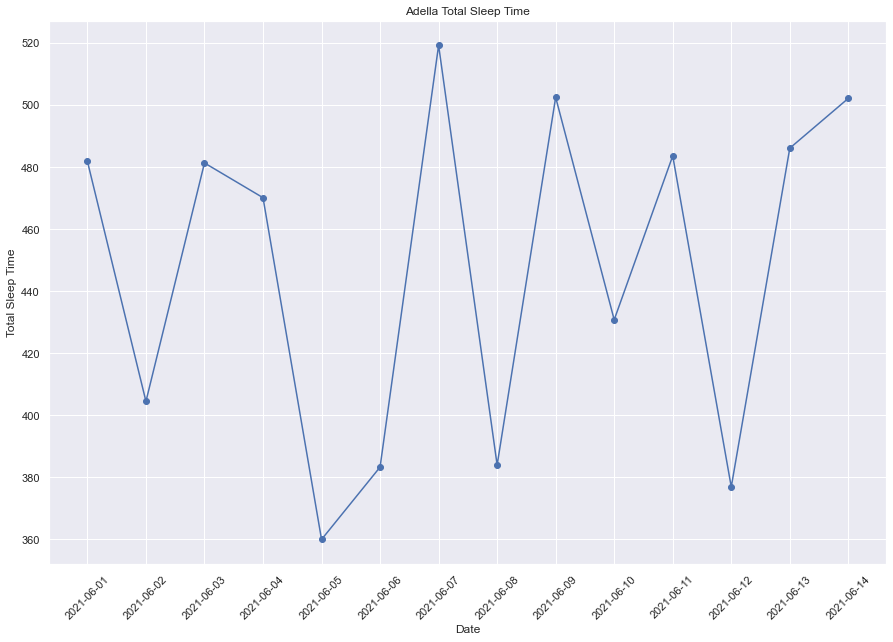

In [82]:
per_night_sleep_data = sleep_data.groupby(['NAME','DATE']).sum()[['DURATION']].reset_index()
c1 = per_night_sleep_data['NAME'] == 'Adella'
single_person_sleep_data = per_night_sleep_data.loc[c1]
fig,axes = plt.subplots(figsize=(15,10))
axes.plot(single_person_sleep_data['DATE'], single_person_sleep_data['DURATION'].values, marker='o')
axes.tick_params('x',labelrotation=45)
axes.set_xlabel('Date')
axes.set_ylabel('Total Sleep Time')
axes.set_title('Adella Total Sleep Time')

### Scatter Plot 

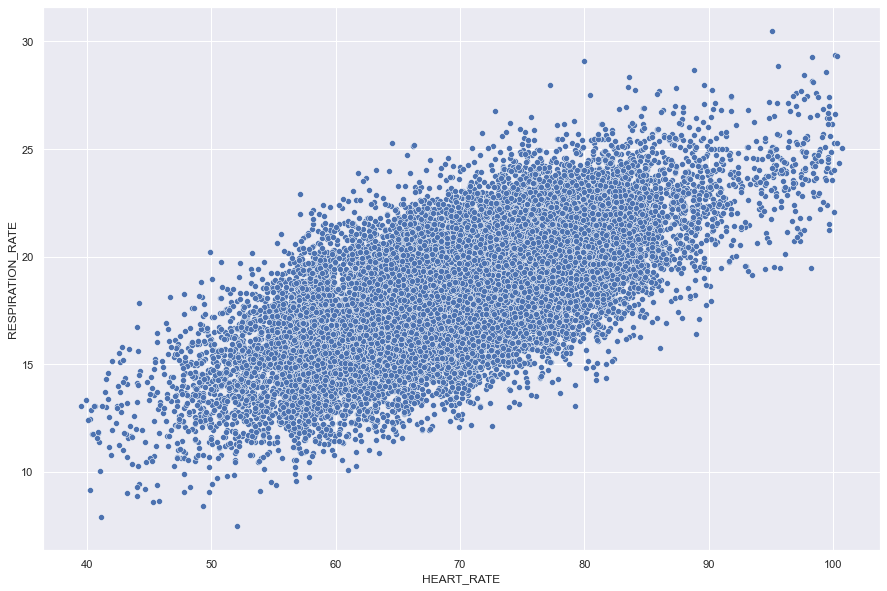

In [83]:
sleep_session_data_with_demographics = pd.merge(sleep_session_data, demographics_data, on='NAME')
mask = sleep_session_data_with_demographics['GENDER'] == 'MALE'
male_data = sleep_session_data_with_demographics.loc[mask]
fig,axes = plt.subplots(figsize=(15,10))
sns.scatterplot(x='HEART_RATE', y='RESPIRATION_RATE', data=male_data)

### Histogram

Text(0, 0.5, '# Persons')

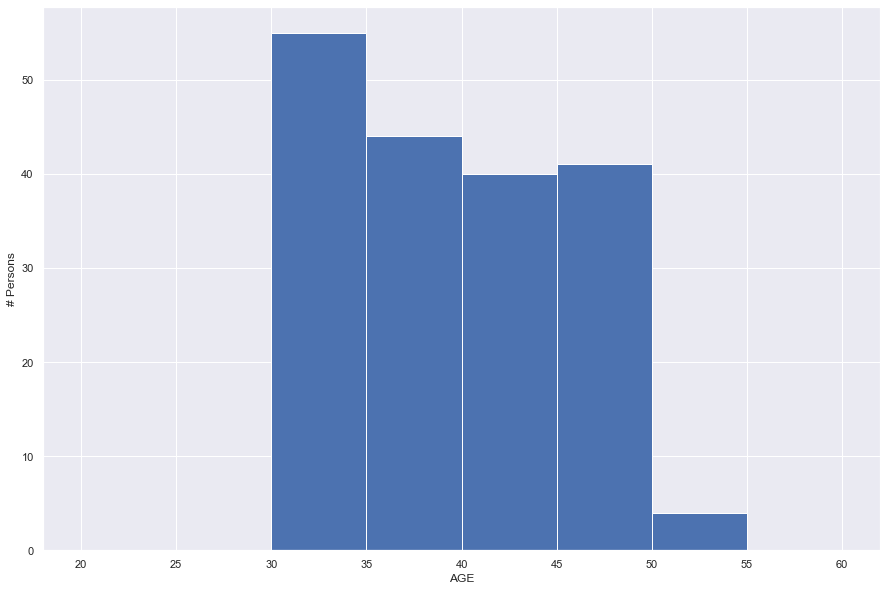

In [84]:
fig,axes = plt.subplots(figsize=(15,10))
axes.hist(demographics_data['AGE'].values, range=(20,60), bins=8)
axes.set_xlabel('AGE')
axes.set_ylabel('# Persons')

### Box Plot 

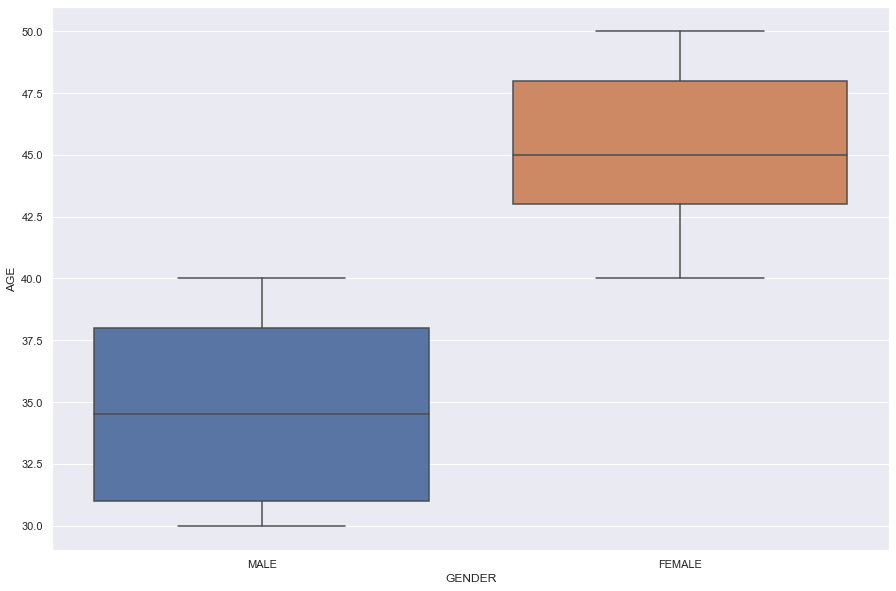

In [85]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(x='GENDER', y='AGE', data=demographics_data)

### HeatMaps 

In [86]:
interval_order = sleep_session_data.sort_values(['START_TIME'])['TWO_HOUR_INTERVAL'].unique()
c1 = sleep_session_data['TYPE'] != 'WAKE'
sleep_type_data = sleep_session_data.loc[c1]
per_person_per_night_interval = sleep_type_data.groupby(['NAME','DATE','TWO_HOUR_INTERVAL']).aggregate({'DURATION':np.sum})

per_person_per_night_interval = per_person_per_night_interval.dropna().reset_index()
per_person_per_night_interval['DAY'] = pd.to_datetime(per_person_per_night_interval['DATE'])
per_person_per_night_interval['DAY'] = per_person_per_night_interval['DAY'].dt.day_name()
per_person_per_night_interval = per_person_per_night_interval.groupby(['NAME','DAY','TWO_HOUR_INTERVAL']).mean()[['DURATION']].reset_index()
per_person_per_night_interval = pd.merge(per_person_per_night_interval, demographics_data, on='NAME')
per_week_day_per_interval = per_person_per_night_interval.groupby(['DAY','TWO_HOUR_INTERVAL']).median()[['DURATION']].unstack()
per_week_day_per_interval.columns = per_week_day_per_interval.columns.droplevel()
per_week_day_per_interval = per_week_day_per_interval.T
per_week_day_per_interval = per_week_day_per_interval.loc[interval_order]

In [87]:
interval_order

array(['20:00:00-22:00:00', '22:00:00-00:00:00', '00:00:00-02:00:00',
       '02:00:00-04:00:00', '04:00:00-06:00:00', '06:00:00-08:00:00',
       '08:00:00-10:00:00'], dtype=object)

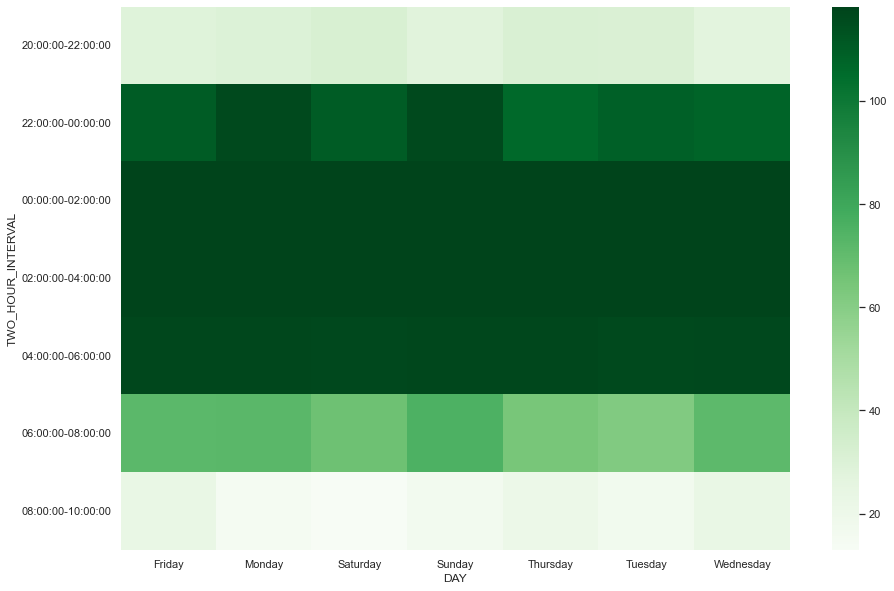

In [88]:
fig,axes = plt.subplots(figsize=(15,10))
sns.heatmap(per_week_day_per_interval, cmap='Greens')

## Adding more dimension to Plots 

In [89]:
# fig,axes = plt.subplots(figsize=(15,10))
# sns.scatterplot(x='HEART_RATE', y='RESPIRATION_RATE', hue='GENDER', data=sleep_session_data_with_demographics)

In [90]:
# sns.relplot(x='HEART_RATE', y='RESPIRATION_RATE', hue='GENDER', col='COUNTRY', col_wrap=2, data=sleep_session_data_with_demographics)

## Seaborn Basics 

### Matplotlib  Figure Anatomy

In [91]:
Image(url='../Assets/anatomy.png', width=900, height=900)

### Fig Vs Axes 

In [92]:
Image(url='../Assets/subplots.png', width=900, height=900)

## Figure Level vs Axes Level functions

* An Axes-level function draws onto a single matplotlib Axes and does not effect the rest of the figure.



* A figure-level function, on the other hand, controls the entire figure. One way to think about this is, a figure-level function can call different Axes-level functions to draw different types of subplots on different Axes 


* Axes Level Functions
    * Relational Plots
      * scatterplot()
      * lineplot()
    * Categorical Plots
      * striplot()           
      * swarmplot()
      * boxplot()    
      * boxenplot()
      * violinplot()             
      * pointplot()      
      * barplot()
      * countplot()
    * Distribution Plots
      * distplot()
      * kdeplot()
      * rugplot()
    * Regression Plots
      * regplot()
      * residplot()
    * MatrixPlots()
      * heatmap()
      
      
      
* Figure Level Functions
    * relplot() -  
        * lineplot()   
        * scatterplot()
    * catplot() -  
        * stripplot()  
        * swarmplot()   
        * boxplot()
        * boxenplot()  
        * violinplot()  
        * pointplot()
        * barplot()  
        * countplot()
    * lmplot() 
        * regplot()

### Axes Level Functions 

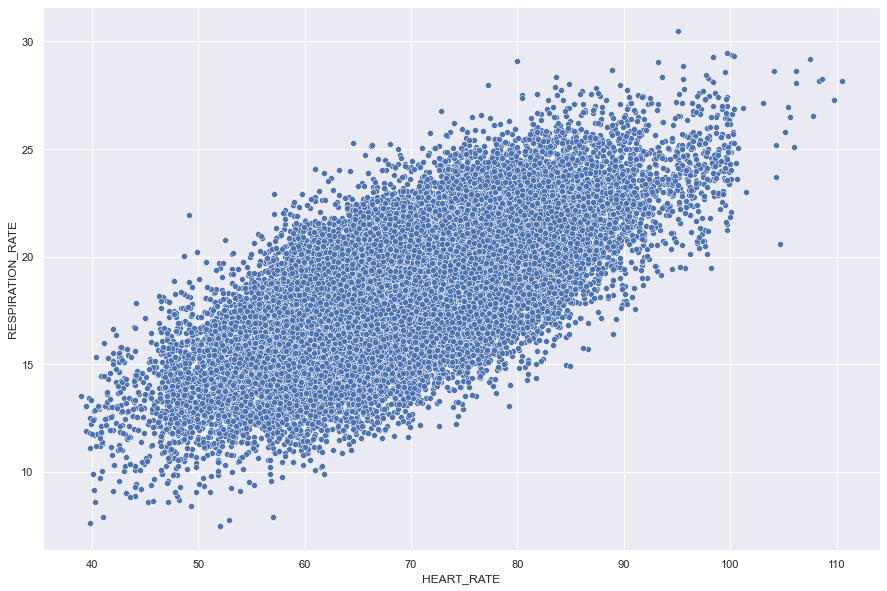

In [93]:
fig,axes = plt.subplots(figsize=(15,10))
sns.scatterplot(x='HEART_RATE', y='RESPIRATION_RATE', data=sleep_session_data, ax=axes)

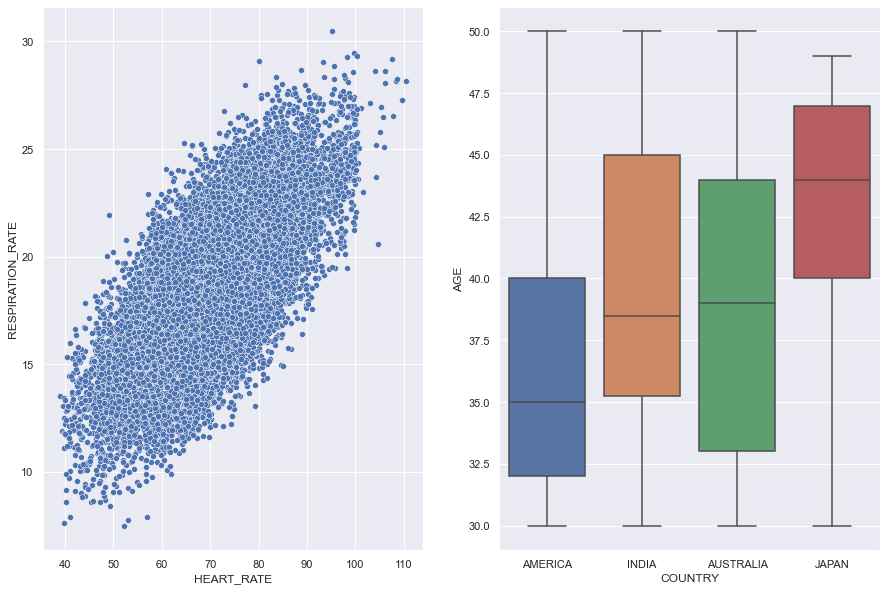

In [94]:
fig,axes = plt.subplots(1,2, figsize=(15,10))
sns.scatterplot(x='HEART_RATE', y='RESPIRATION_RATE', data=sleep_session_data, ax=axes[0])
sns.boxplot(x='COUNTRY', y='AGE', data=demographics_data, ax=axes[1])

### Figure Level Function 

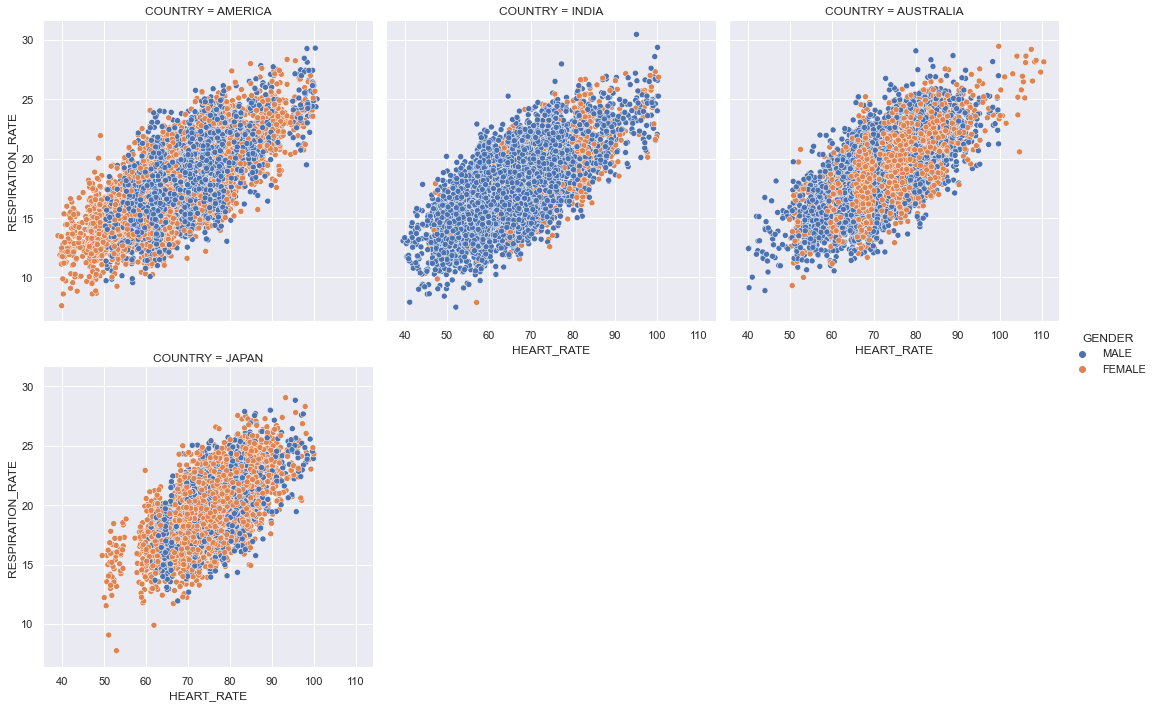

In [95]:
sns.relplot(x='HEART_RATE', y='RESPIRATION_RATE', hue='GENDER', data=sleep_session_data_with_demographics, col='COUNTRY', col_wrap=3)

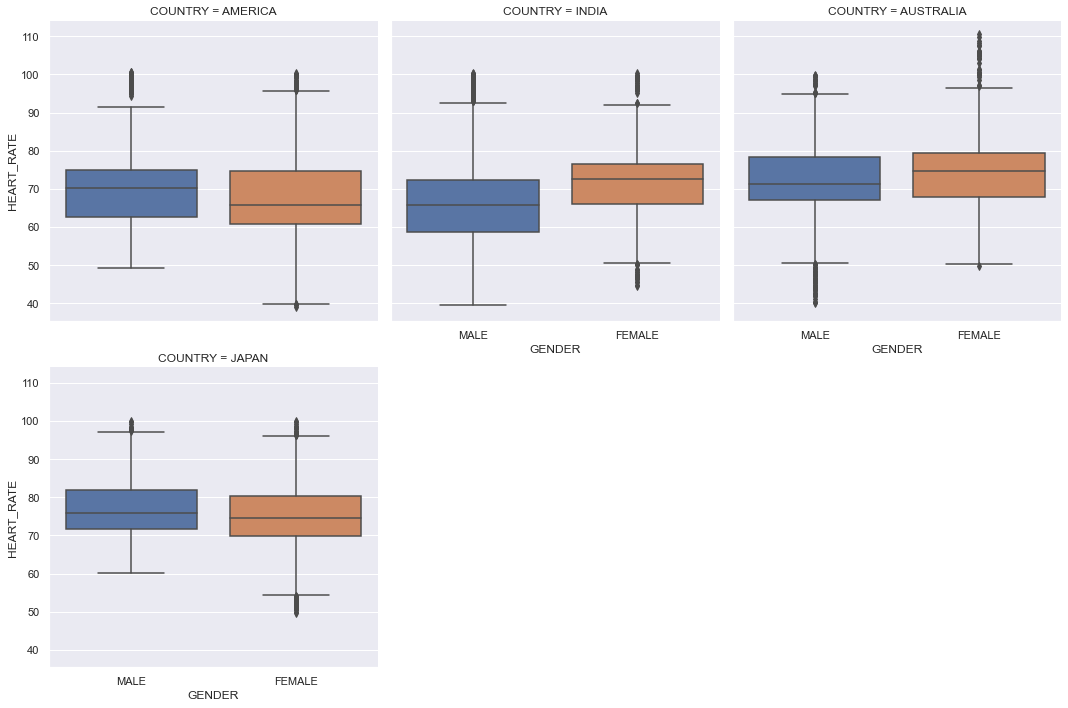

In [96]:
sns.catplot(x='GENDER', y='HEART_RATE', col='COUNTRY', data=sleep_session_data_with_demographics, col_wrap=3, kind='box')

## Questions

### What is the age disctribution of candidates who participated in the study?

You should be able to answer questions like what is the number of person with age between 20 and 30?


Text(0.5, 1.0, 'Age Distribution')

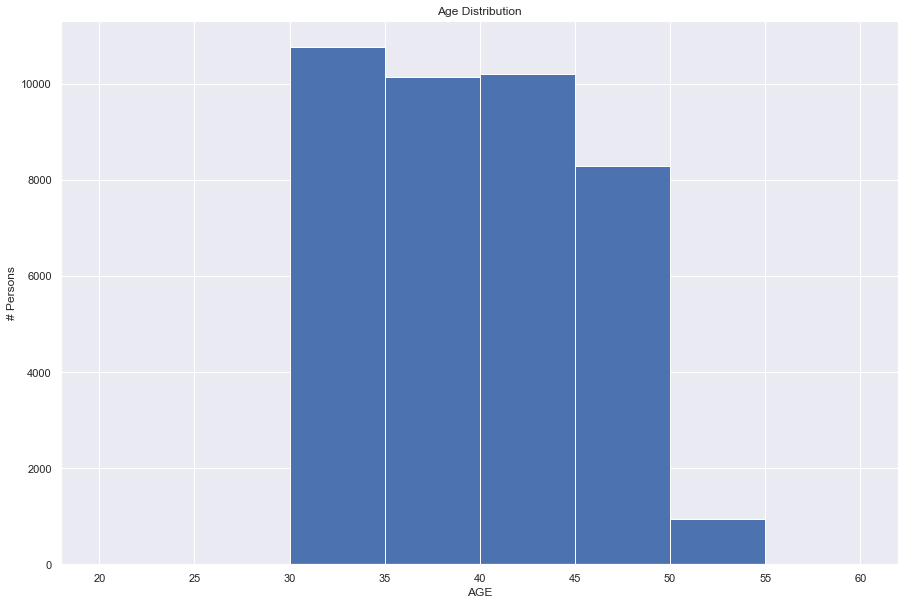

In [97]:
fig,axes = plt.subplots(figsize=(15,10))
axes.hist(sleep_session_data_with_demographics['AGE'].values, range=(20,60), bins=8)
axes.set_xlabel('AGE')
axes.set_ylabel('# Persons')
axes.set_title('Age Distribution')

### Is there a difference between age distribution of male and females?

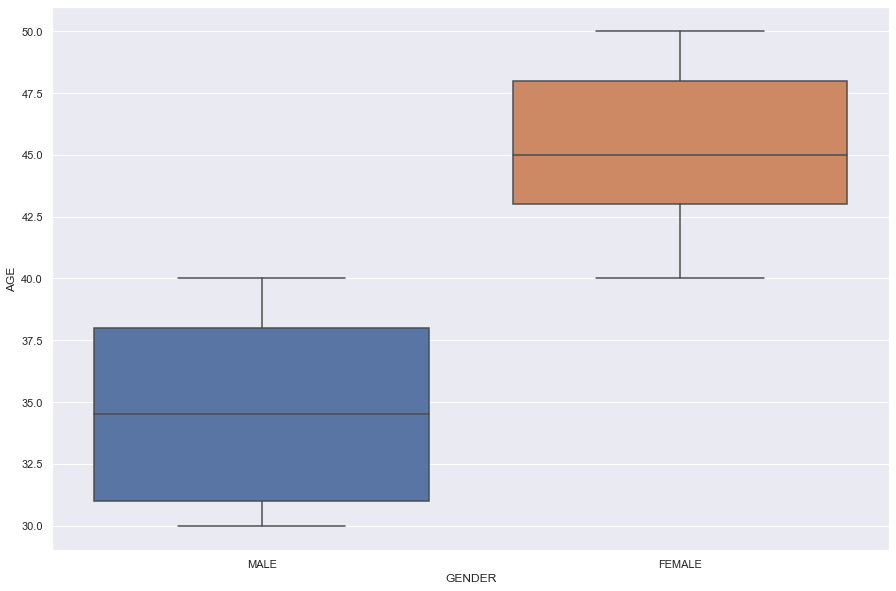

In [98]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(x='GENDER', y='AGE', data=demographics_data)

### Is there a difference between average per night sleep distribution  between males and females

In [99]:
per_night_sleep_data = sleep_data.groupby(['NAME','DATE']).sum()[['DURATION']].reset_index()
per_night_avg_sleep_data = per_night_sleep_data.groupby(['NAME']).mean()[['DURATION']]
per_night_avg_sleep_data = pd.merge(per_night_avg_sleep_data, demographics_data, on='NAME', how='left')

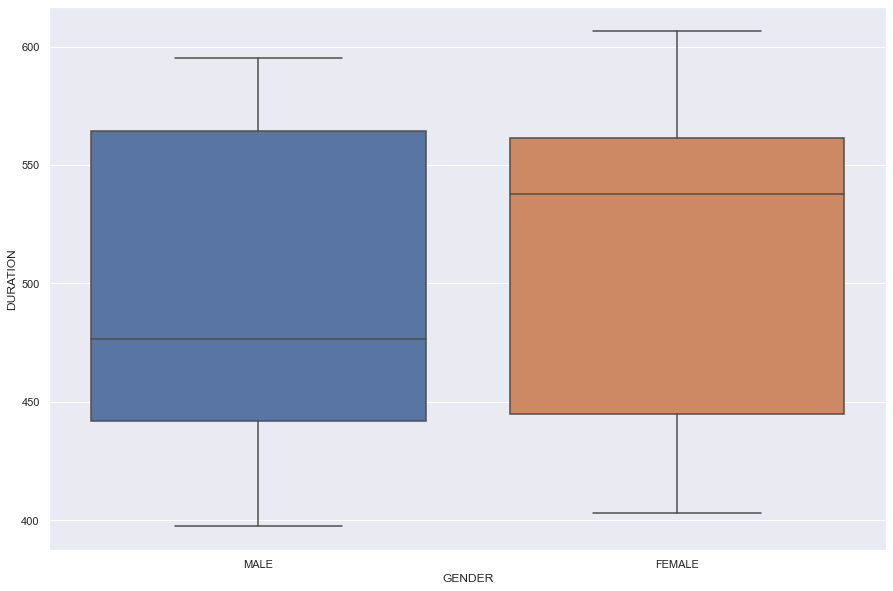

In [100]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(x='GENDER', y='DURATION', data=per_night_avg_sleep_data)

### Is there a difference between average per night sleep distribution  between males and females countyrwise 

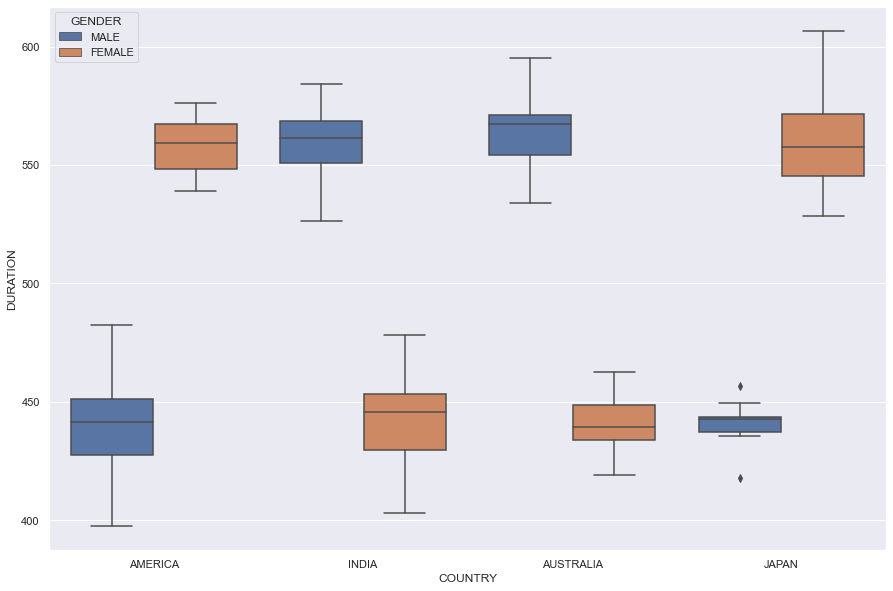

In [101]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(x='COUNTRY', y='DURATION', hue='GENDER', data=per_night_avg_sleep_data)

### Is there a relationship between age and average per night sleep duration? 

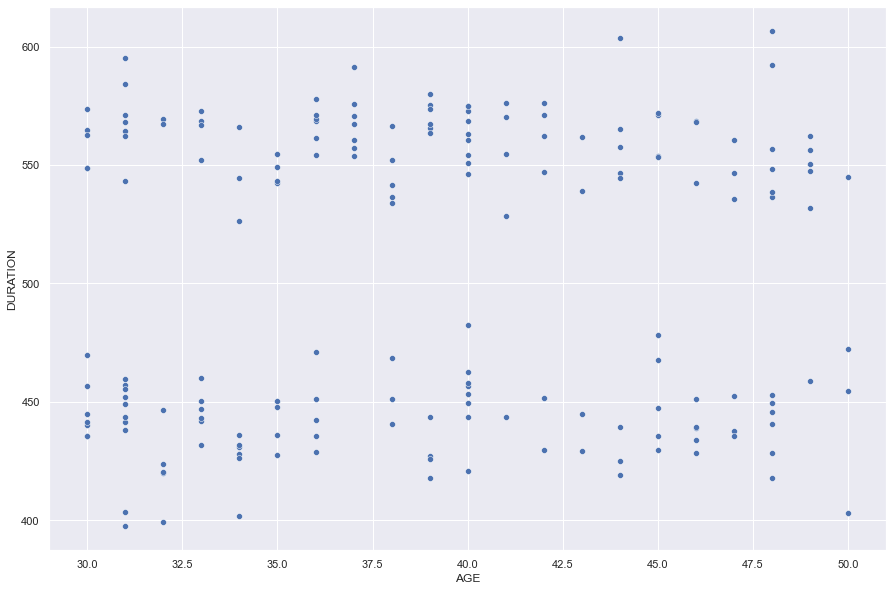

In [102]:
fig,axes = plt.subplots(figsize=(15,10))
sns.scatterplot(x='AGE', y='DURATION', data=per_night_avg_sleep_data)

In [103]:
bins = np.arange(20,60,5)
per_night_avg_sleep_data['AGE_BIN'] = pd.cut(per_night_avg_sleep_data['AGE'], bins=bins)
per_night_avg_sleep_data

,NAME,DURATION,AGE,GENDER,COUNTRY,AGE_BIN
0,Abner,443.390000,39,MALE,AMERICA,"(35, 40]"
1,Abram,446.502778,32,MALE,AMERICA,"(30, 35]"
2,Adelaide,453.170000,40,FEMALE,INDIA,"(35, 40]"
3,Adelbert,399.353333,32,MALE,AMERICA,"(30, 35]"
4,Adella,447.544048,45,FEMALE,AUSTRALIA,"(40, 45]"
...,...,...,...,...,...,...
179,Wilburn,443.532143,31,MALE,JAPAN,"(30, 35]"
180,Wilda,571.222917,42,FEMALE,JAPAN,"(40, 45]"
181,Wilhelmina,435.375000,47,FEMALE,AUSTRALIA,"(45, 50]"
182,Willa,572.105556,45,FEMALE,JAPAN,"(40, 45]"


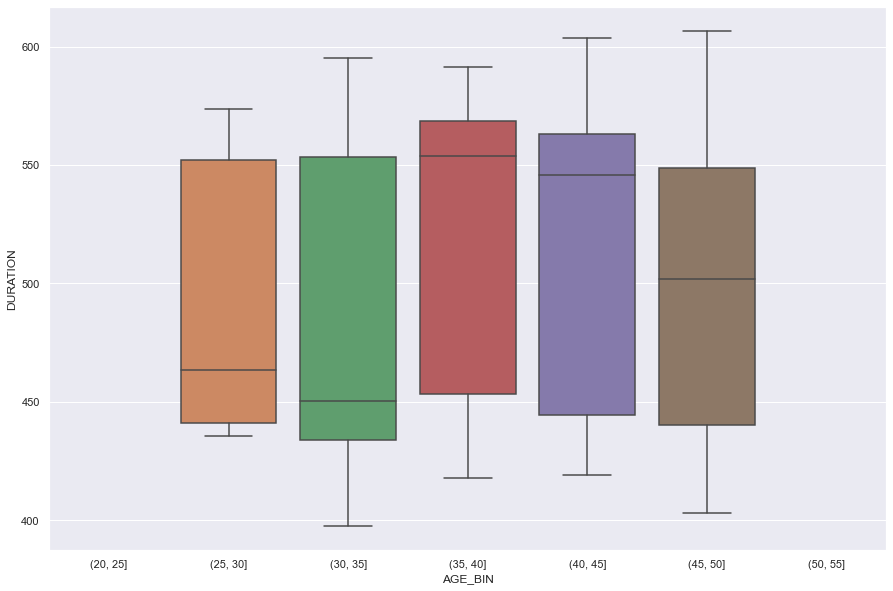

In [104]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(x='AGE_BIN', y='DURATION', data=per_night_avg_sleep_data)

### Is there a relationship between heart-rate and respiration rate

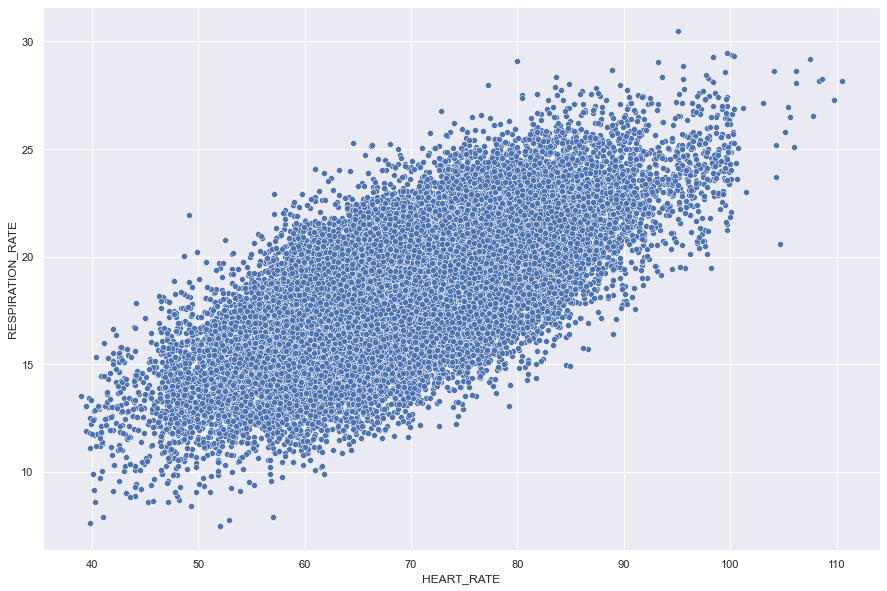

In [105]:
fig,axes = plt.subplots(figsize=(15,10))
sns.scatterplot(x='HEART_RATE', y='RESPIRATION_RATE', data=sleep_session_data_with_demographics)

### Is there a relationship between sleep type and time of the night 

In [106]:
sleep_type = 'DEEP'
c1 =  sleep_session_data['TYPE'] == sleep_type
sleep_type_data  =sleep_session_data.loc[c1]
per_person_per_night_per_interval = sleep_type_data.groupby(['NAME','DATE','TWO_HOUR_INTERVAL']).aggregate({'DURATION':np.sum}).reset_index()
per_person_per_interval = per_person_per_night_per_interval.groupby(['NAME', 'TWO_HOUR_INTERVAL']).median()[['DURATION']].reset_index()
per_person_per_interval = per_person_per_interval.dropna()
per_person_per_interval = pd.merge(per_person_per_interval, demographics_data, on='NAME')

per_person_per_interval = per_person_per_interval.groupby(['TWO_HOUR_INTERVAL']).median()[['DURATION']]
per_person_per_interval = per_person_per_interval.loc[interval_order]

Text(0, 0.5, 'DEEP Sleep Minutes')

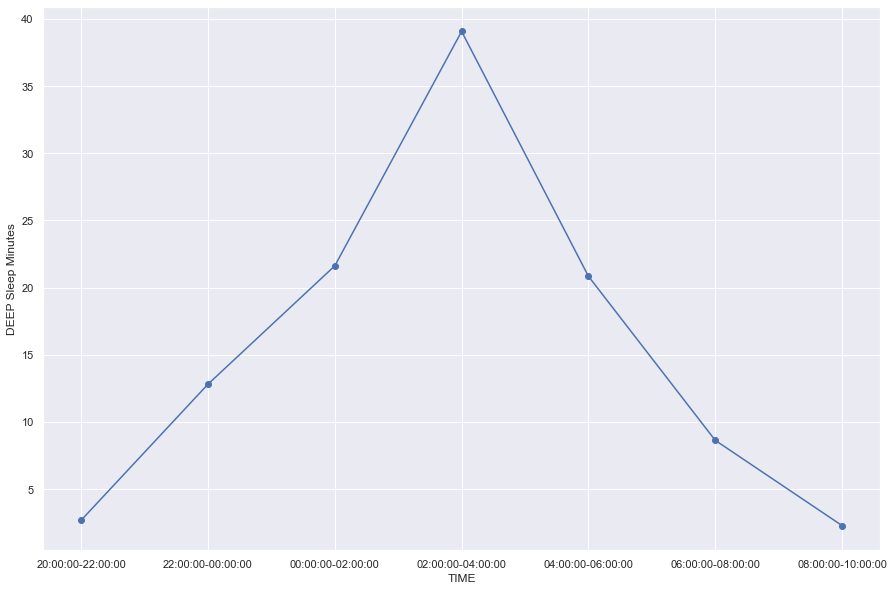

In [107]:
fig,axes = plt.subplots(figsize=(15,10))
axes.plot(per_person_per_interval.index.values, per_person_per_interval['DURATION'], marker='o')
axes.set_xlabel('TIME')
axes.set_ylabel(f"{sleep_type} Sleep Minutes")

### Relationship between day of week, time of night and sleep duration 

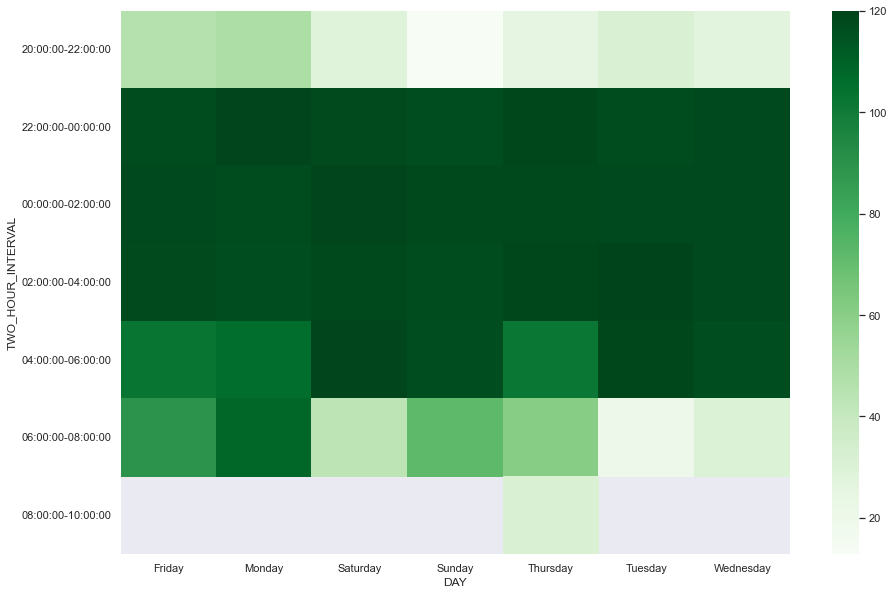

In [108]:
c1 = sleep_session_data['NAME'] == 'Willis'
c2 = sleep_session_data['TYPE'] != 'WAKE'
single_person_data = sleep_session_data.loc[c1 & c2]
per_day_per_interval = single_person_data.groupby(['DATE','TWO_HOUR_INTERVAL']).sum()[['DURATION']].reset_index()

per_day_per_interval['DAY'] = pd.to_datetime(per_day_per_interval['DATE'])
per_day_per_interval['DAY'] = per_day_per_interval['DAY'].dt.day_name()
per_day_per_interval = per_day_per_interval.groupby(['DAY','TWO_HOUR_INTERVAL']).mean()
per_day_per_interval = per_day_per_interval.unstack()
per_day_per_interval.columns = per_day_per_interval.columns.droplevel()
per_day_per_interval = per_day_per_interval.T
per_day_per_interval = per_day_per_interval.loc[interval_order]
fig,axes = plt.subplots(figsize=(15,10))
sns.heatmap(per_day_per_interval, ax=axes, cmap='Greens')

In [109]:
per_day_per_interval

DAY,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
TWO_HOUR_INTERVAL,,,,,,,
20:00:00-22:00:00,46.650000,48.891667,29.133333,12.816667,25.722222,32.055556,27.633333
22:00:00-00:00:00,117.338889,119.300000,117.827778,116.633333,118.788889,117.438889,118.722222
00:00:00-02:00:00,118.466667,117.283333,119.466667,118.191667,117.972222,118.694444,118.572222
02:00:00-04:00:00,117.744444,116.816667,118.300000,117.233333,118.916667,120.000000,118.694444
04:00:00-06:00:00,103.200000,105.800000,119.461111,116.650000,102.233333,118.772222,116.461111
06:00:00-08:00:00,89.733333,108.550000,43.688889,71.958333,60.950000,20.072222,30.350000
08:00:00-10:00:00,NaN,NaN,NaN,NaN,31.833333,NaN,NaN


In [110]:
single_person_data.shape, per_day_per_interval.shape

((315, 9), (7, 7))

## Do it Yourself 

### Is there a relationship between heart rate and sleep stage?

### Is there a relationshipe between heart-rate and gender for different countries? 

### Is there a relationship between day of the week, time of night and deep sleep duration? 